In [ ]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense
import matplotlib.pyplot as plt
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud
import json

In [8]:
df = pd.read_csv('data.csv', names=['sentence'])
df.head()

,sentence
0,"Rame, bener-bener rame banget. Posisi outletny..."
1,Datang kesini sekitar Desember 2022. Dari sore...
2,mcd buaran yang disini terbilang selalu rame.....
3,"Datang kesini sabtu sore, rame buanget.. Sampa..."
4,"Tempat bersih pelayanannya ramah, tersedia lay..."


In [9]:
# menghilangkan baris yang memiliki nilai kosong/null
df = df.dropna(subset=['sentence'])

# menghilangkan tanda baca dan karakter khusus
df['clean_text'] = df['sentence'].str.replace('[^\w\s]', '')

# mengubah teks menjadi huruf kecil
df['clean_text'] = df['clean_text'].str.lower()

# menghilangkan stop words (kata umum yang tidak memberikan informasi tambahan)
nltk.download('stopwords')
stop_words = set(stopwords.words('indonesian'))
df['clean_text'] = df['clean_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


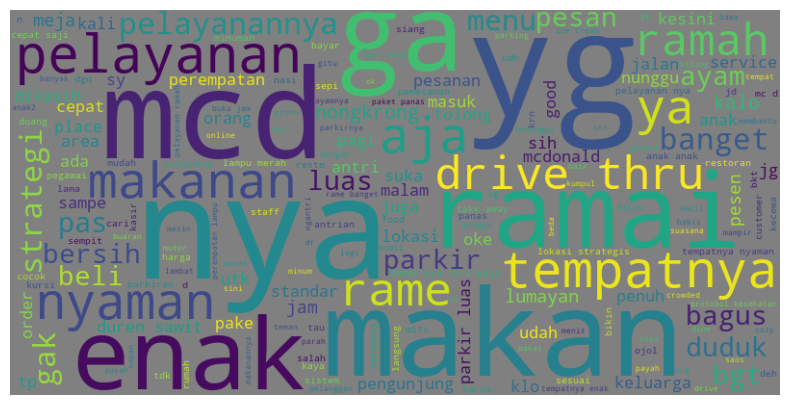

In [11]:
# menggabungkan semua komentar menjadi satu teks
all_text = ' '.join(df['clean_text'])

# membuat objek WordCloud
wordcloud = WordCloud(width=800, height=400, max_font_size=150, background_color='grey', random_state=1).generate(all_text)

# menampilkan gambar WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [12]:
nltk.download('stopwords')
stop_words = set(stopwords.words('indonesian')) #menggunakan 'indonesia' karena ingin menghilangkan kata tambahan dalam bahasa indonesia
stop_words.update(['yg', 'dg', 'rt', 'dgn', 'gw', 'ny', 'd', 'klo', 'kalo', 'amp', 'biar', 'bikin', 'bilang', 'gak', 'ga', 'krn', 'nya', 'nih', 'krna', 'hehe','gon', 'aja', 'rn', 'nd', 'jg', 'juga', 'sebelum', 'setelah', 'pas', 'sih', 'sudah', 'ada', 'kali'])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
# Download VADER Lexicon
nltk.download('vader_lexicon')

# menginisialisasi sentimentintensityanalyzer
sia = SentimentIntensityAnalyzer()

# menghitung sentimen untuk setiap ulasan
df['sentimen'] = df['clean_text'].apply(lambda x: sia.polarity_scores(x)['compound'])

# melabeli sentimen (misalnya "positif, dan 'negatif") berdasarkan nilai sentimen
df['label_sentimen'] = df['sentimen'].apply(lambda x: 1 if x > 0 else 0)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...


In [17]:
df['label_sentimen'].value_counts()
# menampilkan beberapa komentar dan sentimen terkait
df[['sentence', 'label_sentimen']].head(10)

,sentence,label_sentimen
0,"Rame, bener-bener rame banget. Posisi outletny...",0
1,Datang kesini sekitar Desember 2022. Dari sore...,0
2,mcd buaran yang disini terbilang selalu rame.....,0
3,"Datang kesini sabtu sore, rame buanget.. Sampa...",0
4,"Tempat bersih pelayanannya ramah, tersedia lay...",0
5,"Tempatnya nyaman, karyawannya super ramah. Leb...",1
6,Lokasinya di deket perempatan raden inten dure...,0
7,Tempat makan keluarga. Kawan. Tmn kantor. Daer...,1
8,Tempatnya nyaman meski agak rame. Tapi memang ...,0
9,"Tempat yang nyaman untuk makan, minum serta be...",0


In [19]:
df.to_csv('sentimen_mcdonald_duren_sawit.csv', index = False, encoding="utf-8")

In [2]:
df = pd.read_csv('sentimen_mcdonald_duren_sawit.csv')
df = {'sentence': df['sentence'], 'label': df['label_sentimen']}
df = pd.DataFrame(df)
df.head()

,sentence,label
0,"Rame, bener-bener rame banget. Posisi outletny...",0
1,Datang kesini sekitar Desember 2022. Dari sore...,0
2,mcd buaran yang disini terbilang selalu rame.....,0
3,"Datang kesini sabtu sore, rame buanget.. Sampa...",0
4,"Tempat bersih pelayanannya ramah, tersedia lay...",0


In [3]:
# Mengubah seluruh text kedalam bentuk lowercase
df['sentence'] = df['sentence'].str.lower()

# Menghilangkan stopwords
stop_word = set(stopwords.words('indonesian'))
df['sentence'] = df['sentence'].apply(lambda x:' '.join([word for word in x.split() if word not in (stop_word)]))

# Melakukan split dataset
sentence = df['sentence'].values
label = df['label'].values
sentence_train, sentence_test, label_train, label_test = train_test_split(sentence, label, test_size=0.2, shuffle=False)

# Membuat tokenisasi
filt = '!"#$%&()*+.,-/:;=?@[\]^_`{|}~ ' # Filter untuk menghilangkan symbols
tokenizer = Tokenizer(num_words=2000, oov_token="<OOV>", filters=filt)
tokenizer.fit_on_texts(sentence_train)

# Menyimpan word_index kedalam sebuah file json
word_index = tokenizer.word_index
with open('word_index.json', 'w') as fp:
    json.dump(word_index, fp)
    
# Membuat sequences dan melakukan padding
train_sekuens = tokenizer.texts_to_sequences(sentence_train)
test_sekuens = tokenizer.texts_to_sequences(sentence_test)
train_padded = pad_sequences(train_sekuens,
                             maxlen=20,
                             padding='post',
                             truncating='post')
test_padded = pad_sequences(test_sekuens,
                            maxlen=20,
                            padding='post',
                            truncating='post')

In [4]:
# Membuat model
model = tf.keras.Sequential([
    Embedding(2000, 20, input_length=20),
    GlobalAveragePooling1D(),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train model
num_epochs = 30
history = model.fit(train_padded, label_train,
                    epochs=num_epochs,
                    validation_data=(test_padded, label_test),
                    verbose=1)



Epoch 1/30


24/24 [==============================] - 2s 18ms/step - loss: 0.6464 - accuracy: 0.8422 - val_loss: 0.5581 - val_accuracy: 0.9323
Epoch 2/30
24/24 [==============================] - 0s 4ms/step - loss: 0.4859 - accuracy: 0.8748 - val_loss: 0.3169 - val_accuracy: 0.9323
Epoch 3/30
24/24 [==============================] - 0s 4ms/step - loss: 0.3358 - accuracy: 0.8748 - val_loss: 0.2365 - val_accuracy: 0.9323
Epoch 4/30
24/24 [==============================] - 0s 4ms/step - loss: 0.3084 - accuracy: 0.8748 - val_loss: 0.2390 - val_accuracy: 0.9323
Epoch 5/30
24/24 [==============================] - 0s 4ms/step - loss: 0.2793 - accuracy: 0.8774 - val_loss: 0.2370 - val_accuracy: 0.9323
Epoch 6/30
24/24 [==============================] - 0s 4ms/step - loss: 0.2372 - accuracy: 0.9074 - val_loss: 0.2423 - val_accuracy: 0.9219
Epoch 7/30
24/24 [==============================] - 0s 3ms/step - loss: 0.1887 - accuracy: 0.9309 - val_loss: 0.2387 - val_accuracy: 0.9167
Epoch 8/30
24/2

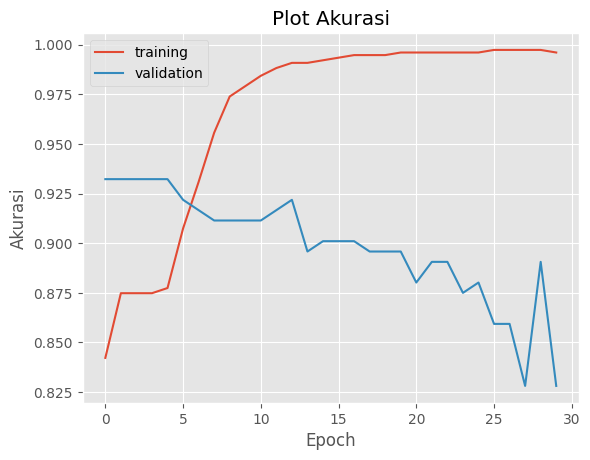

In [5]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, num_epochs), history.history["accuracy"], label="training")
plt.plot(np.arange(0, num_epochs), history.history["val_accuracy"], label="validation")
plt.title("Plot Akurasi")
plt.xlabel("Epoch")
plt.ylabel("Akurasi")
plt.legend()
plt.savefig('images/plot_acc.png')
plt.show()

In [6]:
model.save("model.h5")

C:\Users\Lenovo\data_fauzi\tugas_kuliah\analisis_sentimen\.venv\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
